In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sys
import math
from sympy import *
from IPython.display import display
%matplotlib nbagg

In [2]:
import ipywidgets as widget 
from ipywidgets import interact, interactive

# Bisection algorithm

In [11]:
def mybisection(f, x1, x2, delta):
  f1 = f(x1)
  k = 0
  evec = np.zeros(1000)
  xnew = np.zeros(1000)
  while abs(x1-x2) > delta and k<1000 :
      k = k+1    
      xnew[k] = (x1 + x2)/2
      fnew = f(xnew[k])
      if np.sign(f1)*np.sign(fnew)<0:
          x2 = xnew[k]
      else:
          x1 = xnew[k]
      evec[k] = abs(x1-x2)
      print('iteration '+str(k)+',\t x1='+str(x1)+',\t x2='+str(x2)+',\t error is '+str(evec[k])+'\n')
  x = (x1+x2)/2
  evec = evec[1:k]
  xnew = xnew[1:k]
  return evec, xnew, x

In [12]:
def f_bisection(x):
  return x**2-100
x1 = -1000
x2 = 1000
delta = 0.1
sol_evec, sol_xnew, sol_x = mybisection(f_bisection, x1, x2, delta)
print('The final solution x of our algorithm is:'+str(sol_x))

iteration 1,	 x1=-1000,	 x2=0.0,	 error is 1000.0

iteration 2,	 x1=-500.0,	 x2=0.0,	 error is 500.0

iteration 3,	 x1=-250.0,	 x2=0.0,	 error is 250.0

iteration 4,	 x1=-125.0,	 x2=0.0,	 error is 125.0

iteration 5,	 x1=-62.5,	 x2=0.0,	 error is 62.5

iteration 6,	 x1=-31.25,	 x2=0.0,	 error is 31.25

iteration 7,	 x1=-15.625,	 x2=0.0,	 error is 15.625

iteration 8,	 x1=-15.625,	 x2=-7.8125,	 error is 7.8125

iteration 9,	 x1=-11.71875,	 x2=-7.8125,	 error is 3.90625

iteration 10,	 x1=-11.71875,	 x2=-9.765625,	 error is 1.953125

iteration 11,	 x1=-10.7421875,	 x2=-9.765625,	 error is 0.9765625

iteration 12,	 x1=-10.25390625,	 x2=-9.765625,	 error is 0.48828125

iteration 13,	 x1=-10.009765625,	 x2=-9.765625,	 error is 0.244140625

iteration 14,	 x1=-10.009765625,	 x2=-9.8876953125,	 error is 0.1220703125

iteration 15,	 x1=-10.009765625,	 x2=-9.94873046875,	 error is 0.06103515625

The final solution x of our algorithm is:-9.979248046875


# Bisection illustration

In [1]:
# x axis values
x = np.zeros(sol_xnew.size*2)
# corresponding y axis values
y = np.zeros(sol_xnew.size*2)

for i in range(0, sol_xnew.size):
  x[2*i] = sol_xnew[i]
  x[2*i+1] = sol_xnew[i]
  y[2*i] = f_bisection(sol_xnew[i])
  y[2*i+1] = 0

# plotting the points
for i in range(0, sol_xnew.size):
    plt.plot(x[2*i:2*i+2], y[2*i:2*i+2], color='green', linestyle='dashed', linewidth = 3,
      marker='o', markerfacecolor='blue', markersize=6)
    plt.show()
  
x_samples = np.linspace(x1,x2,100)
y2 = f_bisection(x_samples)
plt.plot(x_samples,y2,'r')
plt.grid()

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')

# giving a title to my graph
plt.title('Convergence to the solution of every iteration')

# function to show the plot
plt.show()


NameError: name 'np' is not defined

# Gauss elimination

In [27]:
# Gauss elimination method solving Ax=b linear system
# inputs: A=matrix of coeficients, b=vector of right hand side
# output: x solution for Ax=b

def Gauss_elimination(A, b):
  A_rows = A.shape[0]
  A_cols = A.shape[1]
  
  # return an error in case of: (amount of rows in A) != (length of vec b)
  if A_rows != b.shape[0] :
    sys.exit('invalid A matrix') 
  # return an error in case where A is not a squared matrix
  if A_rows != A_cols :
    sys.exit('invalid A matrix') 

  M = np.c_[A,b]
  # do we wish to run from 1 to A_rows-1?
  for i in range(A_rows):
      Mtmp = M
      # do we wish to run from i+1 to A_rows-1?
      for j in range(i+1, A_rows):
          if Mtmp[j,i]!=0 :
              Mtmp[j,:] = M[j,:]*M[i,i] - M[i,:]*M[j,i]
              
      print('step '+str(i+1)+' \n')
      print('A = ')
      print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in Mtmp[:,0:A_rows]]))
      print('b = '+str(Mtmp[:,A_rows])+' \n')
      M = Mtmp

  # back  substitution
  x = np.zeros(b.shape[0])
  for i in range(A_rows-1,-1,-1):
      x[i] = (M[i,A_rows] - np.sum(np.multiply(M[i,i+1:A_rows],x[i+1:A_rows]))) / M[i,i]
  return x

In [28]:
A = np.random.randint(0,100, size=(3, 3))
print('the random generated matrix A is:')
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in A]))
x = np.array([1,2,3])
b = A @ x
x_sol = Gauss_elimination(A, b)
print('The final solution for Ax=b is: x = '+str(x))

the random generated matrix A is:
80	21	30
18	92	10
98	95	75
step 1 

A = 
80	21	30
0	6982	260
0	5542	3060
b = [  212 14744 20264] 

step 2 

A = 
80	21	30
0	6982	260
0	0	19924000
b = [     212    14744 59772000] 

step 3 

A = 
80	21	30
0	6982	260
0	0	19924000
b = [     212    14744 59772000] 

The final solution for Ax=b is: x = [1 2 3]


# Newton-Raphson algorithm

In [102]:
def f_NR(x):
  return x**2 - 100

# a way to compute the derivative of f(x) in python, without any manual computation 
# used to make sure our ftag(x) is correctly calculated
def ftag_calculator(f):
  x = Symbol('x')
  y = f(x)
  return y.diff(x)

def ftag_NR(x):
  return 2*x

In [103]:
#  newton raphson method
#  inputs: x0=intial guess, f=function for f(x)=0, ftag=function for df/dx,
#  delta=stoping threshold, plot_flag=flag to plot or not the progress of
#  the solution
#  output: x=the final solution, evec=the vector of errors, xnew=vector of x
#  in each iteration
def my_NR(x0, f, ftag, delta, k):

  f0 = f(x0)
  evec = []
  xnew = []
  i = 0
  er = 100
  current_root_solution = x0 
  # in case we haven't reached the wanted error rate after k iterations, stop the while loop anyway
  while abs(er) > delta and i < k:
    i = i+1
    xnew.append(current_root_solution - f(current_root_solution)/ftag(current_root_solution))
    # extracting the recent element just added to xnew to compute f(x)
    fnew = f(xnew[-1])
    
    er = abs(xnew[-1]-current_root_solution)
    evec.append(er)

    print('iteration '+str(i)+',\t computed root solution = '+str(xnew[-1])+',\t error is '+str(er))
    current_root_solution = xnew[-1]

  #returning our final numerical solution
  solution = current_root_solution
  return solution, xnew

In [110]:
solution, xnew = my_NR(1000, f_NR, ftag_NR, 0.0001, 1000)

print(solution)

iteration 1,	 computed root solution = 500.05,	 error is 499.95
iteration 2,	 computed root solution = 250.1249900009999,	 error is 249.9250099990001
iteration 3,	 computed root solution = 125.26239505846617,	 error is 124.86259494253373
iteration 4,	 computed root solution = 63.03035962394365,	 error is 62.232035434522516
iteration 5,	 computed root solution = 32.30844833048122,	 error is 30.721911293462433
iteration 6,	 computed root solution = 17.701806998329744,	 error is 14.606641332151476
iteration 7,	 computed root solution = 11.675473894984787,	 error is 6.026333103344957
iteration 8,	 computed root solution = 10.120218365353947,	 error is 1.5552555296308395
iteration 9,	 computed root solution = 10.000714038711745,	 error is 0.11950432664220223
iteration 10,	 computed root solution = 10.000000025490744,	 error is 0.0007140132210015082
iteration 11,	 computed root solution = 10.0,	 error is 2.5490743738032506e-08
10.0


# Newton-Rpahson algorithm illustration

<IPython.core.display.Javascript object>


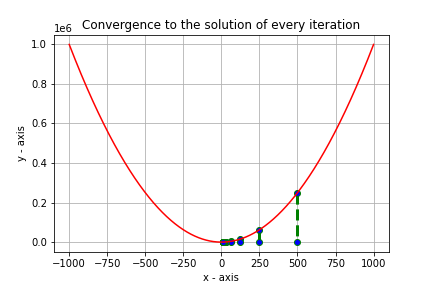

In [113]:
# converting xnew to an array
xnew = np.array(xnew)

# x axis values
x = np.zeros(xnew.size*2)
# corresponding y axis values
y = np.zeros(xnew.size*2)

for i in range(0, xnew.size):
  x[2*i] = xnew[i]
  x[2*i+1] = xnew[i]
  y[2*i] = f_NR(xnew[i])
  y[2*i+1] = 0

# plotting the points
for i in range(0, xnew.size):
  plt.plot(x[2*i:2*i+2], y[2*i:2*i+2], color='green', linestyle='dashed', linewidth = 3,
      marker='o', markerfacecolor='blue', markersize=6)
  
x_samples = np.linspace(x1,x2,10000)
y2 = f_NR(x_samples)
plt.plot(x_samples,y2,'r')
plt.grid()

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')

# set the limit of values of the plot in x and y axis
# according to x and y values
# plt.xlim(-20, 64)
# plt.ylim(-110, 800)

# giving a title to my graph
plt.title('Convergence to the solution of every iteration')

# function to show the plot
plt.show()

<IPython.core.display.Javascript object>


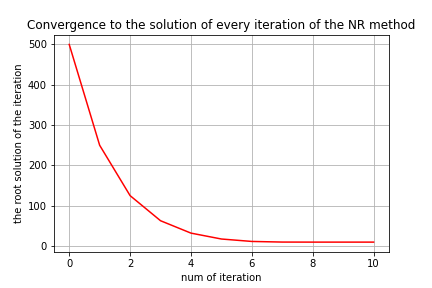

In [114]:
plt.title('Convergence to the solution of every iteration of the NR method')

# naming the x axis
plt.xlabel('num of iteration')
# naming the y axis
plt.ylabel('the root solution of the iteration')

plt.plot(xnew,'r')
plt.grid()

# LU decomposition

In [190]:
def LU_decomposition(A):
    if(A.shape[0] != A.shape[1]):
        sys.exit('A needs to be squared')
    n = A.shape[0]
    L = np.eye(n)
    U = np.zeros((n,n))
    for u in range(n):
        U[u,u:] = A[u,u:]
        L[u+1:,u] = A[u+1:,u]/A[u,u]
        A[u+1:, u+1:] = A[u+1:, u+1:] - L[u+1:,u].reshape(-1,1).dot(U[u,u+1:].reshape(1,n-u-1))
    return L, U

In [196]:
# don't forget to add dtype=float!!
A = np.array(([1,3,1], [2,8,1], [1,10,4]), dtype=float)
A_L , A_U = LU_decomposition(A)
print('A = ')
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in A[:,0:A.shape[0]]]))
print('\nL = ')
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in A[:,0:A_L.shape[0]]]))
print('\nU = ')
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in A[:,0:A_U.shape[0]]]))

A = 
1.0	3.0	1.0
2.0	2.0	-1.0
1.0	7.0	6.5

L = 
1.0	3.0	1.0
2.0	2.0	-1.0
1.0	7.0	6.5

U = 
1.0	3.0	1.0
2.0	2.0	-1.0
1.0	7.0	6.5


In [192]:
A_L@A_U

array([[ 1.,  3.,  1.],
       [ 2.,  8.,  1.],
       [ 1., 10.,  4.]])

# Jacobi and Gauss-Seidel Iterative Methods

In [63]:
#jacobi
def jacobi(delta, A, b, x0):
    xnew = x0.copy()
    err = delta + 1 #changed, for modularity
    k=0
    n = A.shape[0]
    while (err > delta and k<1e4):
        k = k+1
        temp = xnew.copy()
        for i in range(n):
            xnew[i] = b[i]/A[i,i] - np.sum(A[i,0:i]@xnew[:i])/A[i,i] - np.sum(A[i,i+1:]@xnew[i+1:])/A[i,i]
        err = np.sqrt(np.sum((xnew-temp)**2))
    return xnew, k


#G-S
def GS(delta, A, b, x0):
    err = delta + 1 #changed, for modularity
    k=0
    n = A.shape[0]
    masking_i = np.ones(n, dtype=bool)
    while (err > delta and k < 1e4):
        k = k+1
        xold = x0.copy() #explain why copy is needed
        for i in range(n):
            #extracting the i-th row of matrix A
            A_row_i = A[i,:]
            #preparing the masking of the i-th value by putting 0 ()
            masking_i[i] = 0 
            # the masking will not actually change the length of row_i or x0 by value
            # claculating x0 of this iteration:
            x0[i] = (b[i] - A_row_i[masking_i]@x0[masking_i])/A[i,i] 
            # the matlab code: x0(i) = [b(i) - (A(i,[1:i-1,i+1:n])*x0([1:i-1,i+1:n]))]/A(i,i)
            # return the masking array back to origin for next iteration
            masking_i[i] = 1
        err = np.sqrt(np.sum((x0-xold)**2))
    return x0, k


In [64]:
# for explanation reasons (emphasize the difference from Matlab)
x = np.array([1,2,3])
A = np.array(([1,3,1], [2,8,1], [1,10,4]), dtype=float)
x2 = x
x2[1] = 10
print(x)
x1 = np.ones(x.size, dtype=bool)
x1[1] = 0
A_row0 = A[0,:]
print(x[x1])
print(A_row0[x1])
print(A_row0)
print(A)

[ 1 10  3]
[1 3]
[1. 1.]
[1. 3. 1.]
[[ 1.  3.  1.]
 [ 2.  8.  1.]
 [ 1. 10.  4.]]


In [65]:
# for explanation reasons
x = np.array([1,2,3])
x2 = x.copy()
x2[1] = x2[1]+8
print(x)
print(x2)

[1 2 3]
[ 1 10  3]


# Invoking and comparing Gauss-Seidel, Jacobi (Same inputs for both)

In [71]:
A_jacobi = np.array(([1,3,1], [2,8,1], [1,10,4]), dtype=float)
x = np.array([1,2,3], dtype=float)
x0 = np.array([7,100,5], dtype=float)
b = A_jacobi@x
delta = 0.01
x_sol, k = jacobi(delta, A_jacobi, b, x0)

In [72]:
print('the solution of the Jacobi algorithm: '+str(x_sol))
print('the solution was achieved after: '+str(k)+' iterations')
print('the real solution is: '+str(x))


the solution of the GS algorithm: [0.99459228 2.00270386 2.99459229]
the solution was achieved after: 16 iterations
the real solution is: [1. 2. 3.]


In [73]:
A_GS = np.array(([1,3,1], [2,8,1], [1,10,4]), dtype=float)
x = np.array([1,2,3], dtype=float)
x0_gs = np.array([7,100,5], dtype=float)
b_gs = A_GS@x
delta = 0.1
x_sol_gs, k_gs = GS(delta, A_GS, b_gs, x0_gs)

In [74]:
print('the solution of the GS algorithm: '+str(x_sol_gs))
print('the solution was achieved after: '+str(k_gs)+' iterations')
print('the real solution is: '+str(x))

the solution of the GS algorithm: [0.95673806 2.02163083 2.95673841]
the solution was achieved after: 13 iterations
the real solution is: [1. 2. 3.]


# Non-linear equation systems

In [ ]:
def Gauss_elimination_no_prints(A, b):
  A_rows = A.shape[0]
  A_cols = A.shape[1]
  
  # return an error in case of: (amount of rows in A) != (length of vec b)
  if A_rows != b.shape[0] :
    sys.exit('invalid A matrix') 
  # return an error in case where A is not a squared matrix
  if A_rows != A_cols :
    sys.exit('invalid A matrix') 

  M = np.c_[A,b]
  
  for i in range(A_rows):
      Mtmp = M
      for j in range(i+1, A_rows):
          if Mtmp[j,i]!=0 :
              Mtmp[j,:] = M[j,:]*M[i,i] - M[i,:]*M[j,i]
      M = Mtmp

  # back  substitution
  x = np.zeros(b.shape[0])
  for i in range(A_rows-1,-1,-1):
      x[i] = (M[i,A_rows] - np.sum(np.multiply(M[i,i+1:A_rows],x[i+1:A_rows]))) / M[i,i]
  return x

def non_linear_solver(X, delta, k, itervalues) : 
    # making the float numbers presented with only four numbers after the decimal point
    float_formatter = "{:.4f}".format
    np.set_printoptions(formatter={'float_kind':float_formatter})
    
    # as we've seen in the lecture, we nust calculate: J * deltaX = -F
    # for that, we'll use the Gauss Elimination method
    deltaX = Gauss_elimination_no_prints(Jacobian_circles(X), -1*F_circles(X))
    X_next = X + deltaX
    itervalues += X_next.tolist()
    
    if(np.sqrt(np.sum(X-X_next)**2) < delta or k == 1000) :
        return X_next, itervalues
    return non_linear_solver(X_next, delta, k+1, itervalues)

# Running the non-linear equation solver - example 1

In [7]:
def F(X) : 
    x1 = X[0]
    x2 = X[1]
    x3 = X[2]
    out1 = 3*x1 - np.cos(x2*x3)-0.5
    out2 = x1**2-81*((x2+0.1)**2)+ np.sin(x3)+1.06
    out3 = np.exp(-x1*x2)+20*x3+(10*np.pi-3)/3
    arr = np.array([out1, out2, out3], dtype = 'f')
    return arr 

def Jacobian(X) :
    x1 = X[0]
    x2 = X[1]
    x3 = X[2]
    out1 = 3
    out2 = x3*np.sin(x2*x3)
    out3 = x2*np.sin(x2*x3)
    out4 = 2*x1
    out5 = -162*(x2+0.1)
    out6 = np.cos(x3)
    out7 = -x2*np.exp(-x1*x2)
    out8 = -x1*np.exp(-x1*x2)
    out9 = 20
    arr = np.array([[out1, out2, out3], [out4, out5, out6], [out7, out8, out9]], dtype= 'f')
    return arr

def X0( x0_1, x0_2, x0_3) :
    arr = np.array([x0_1, x0_2, x0_3], dtype = 'f')
    return arr

In [8]:
X = X0(0.1,0.1,0.1)
values_list = X.tolist() #initializing a 1d list with X0 values
X_sol, values_list = non_linear_solver(X, 0.001, 1, values_list)
print("\nAs expected, F(X_sol) returns: \n")
print(np.abs(F(X_sol)))

step 1 

X = [0.5002 0.0195 -0.5215] 

step 2 

X = [0.5000 0.0016 -0.5236] 

step 3 

X = [0.5000 0.0000 -0.5236] 

step 4 

X = [0.5000 0.0000 -0.5236] 


As expected, F(X_sol) returns: 

[0.0000 0.0000 0.0000]


# Running the non-linear equation solver on two circles - example 2

In [20]:
def F_circles(X) : 
    x1 = X[0]
    y1 = X[1]
    circle1 = (x1 - (-0.2))**2 + (y1 - 0)**2 - 0.3**2 #equation of the first circle
    circle2 = (x1 - (0.2))**2 + (y1 - 0)**2 - 0.3**2 #equation of the second circle
    arr = np.array([circle1, circle2], dtype = 'f') 
    return arr 

def Jacobian_circles(X) :
    x1 = X[0]
    y1 = X[1]
    circle1_dx = 2*(x1 - (-0.2)) 
    circle1_dy = 2*(y1 - 0) 
    circle2_dx = 2*(x1 - (0.2))  
    circle2_dy = 2*(y1 - 0) 
    jacobian = np.array([[circle1_dx, circle1_dy], [circle2_dx, circle2_dy]], dtype= 'f')
    return jacobian

def X0( x0_1, y0_1) :
    arr = np.array([x0_1, y0_1], dtype = 'f')
    return arr

<IPython.core.display.Javascript object>


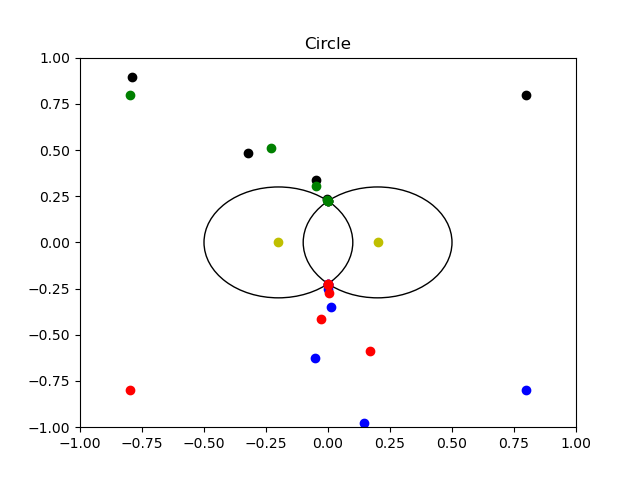

In [21]:
X0_sign = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
color = ['black', 'blue', 'red', 'green']

figure, axes = plt.subplots()

for i in range(4) :
    X = X0(X0_sign[i][0]*0.8, X0_sign[i][1]*0.8)
    values_list = X.tolist() #initializing a 1d list with X0 values
    X_sol, values_list = non_linear_solver(X, 0.001, 1, values_list)
    values_arr_x = np.array(values_list[::2]) #collecting the x-coordinate values
    values_arr_y = np.array(values_list[1::2]) #collecting the y-coordinate values
    plt.plot(values_arr_x, values_arr_y, 'o', color=color[i])

Drawing_uncolored_circle = plt.Circle( (-0.2, 0 ), 0.3 ,fill = False )
Drawing_uncolored_circle2 = plt.Circle( (0.2, 0), 0.3 ,fill = False ) 
plt.plot(0.2,0,'yo')
plt.plot(-0.2,0,'yo')
axes.add_artist( Drawing_uncolored_circle )
axes.add_artist( Drawing_uncolored_circle2 )
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title( 'Circle' )
plt.show()

# Thomas - inefficient version (memory wise)

In [55]:
def Thomas(T,b) : 
    n= T.shape[0]
    U=np.eye(n)
    L=np.eye(n)
    U[0,0] = T[0,0]
    # LU decomposition for thomas
    for i in range(1,n) :
        U[i-1,i] = T[i-1,i]
        L[i,i-1] = T[i,i-1]/ U[i-1,i-1]
        U[i,i] = T[i,i]-L[i,i-1] * T[i-1,i]

    # forward substitution
    y = np.zeros(n)
    y[0] = b[0]
    for i in range(1,n) :
        y[i] = b[i]-(L[i,i-1]*y[i-1])

    # backward substitution
    x = np.zeros(n)
    x[n-1] = y[n-1]/U[n-1, n-1]
    for i in range(n-2,-1,-1) :
        x[i] = (y[i]-(U[i,i+1]*x[i+1]))/U[i,i]
    return L, U, x

# example run of the Thomas algorithm
T = np.array([[3,-4,0],[6,-17,11],[0,8,1]], dtype = 'f')
x2 = np.ones(3)
L_full, U_full, x_sol = Thomas(T, T@x2)
print(str(T)+'\n')
print(str(L_full)+'\n')
print(str(U_full)+'\n')
print(str(L_full@U_full)+'\n')
print(str(x_sol)+'\n')

[[3.0000 -4.0000 0.0000]
 [6.0000 -17.0000 11.0000]
 [0.0000 8.0000 1.0000]]

[[1.0000 0.0000 0.0000]
 [2.0000 1.0000 0.0000]
 [0.0000 -0.8889 1.0000]]

[[3.0000 -4.0000 0.0000]
 [0.0000 -9.0000 11.0000]
 [0.0000 0.0000 10.7778]]

[[3.0000 -4.0000 0.0000]
 [6.0000 -17.0000 11.0000]
 [0.0000 8.0000 1.0000]]

[1.0000 1.0000 1.0000]



# Thomas - efficient solution (memory wise)

In [56]:
# T is three col matrix with a,b,c vectors such that a(0)=0,c(end)=0, b is the right hand side vector
def Thomas2(T,b) :
    n = T.shape[1]
    U = np.zeros(n)
    L = np.zeros(n)
    U[0] = T[0,1]
    for i in range(1,n):
        L[i] = T[i,0]/U[i-1] # T[i,0] = a[i]
        U[i] = T[i,1] - L[i]*T[i-1,2] # T[i,1] = b[i] , T[i-1,2]= c[i-1]

    y = np.zeros(n)
    y[0] = b[0]
    for i in range(1,n):
        y[i] = b[i]-L[i]*y[i-1]

    x = np.zeros(n)
    x[n-1] = y[n-1]/U[n-1]
    for i in range(n-2,-1,-1) :
        x[i] = (y[i]-(T[i,2]*x[i+1]))/U[i]
        
    return L, U, x

In [60]:
# example run of the Thomas2 algorithm
a = np.array([0,6,8] , dtype = 'f')
b =  np.array([3,-17,1], dtype = 'f')
c =  np.array([-4,11,0], dtype = 'f')
#same matrix as T in the previous run, only organized differntly 
T2 = np.c_[a,b,c]

b_thomas = np.array([-1,0,9], dtype='f')

x2 = np.ones(3)
L, U, x_sol = Thomas2(T2, b_thomas)

print("L's lower sub-diagonal is: ")
print(str(L)+'\n')
print('Indeed, we get the same lower sub-diagonal as in the previous run with full L:')
print(str(L_full)+'\n')
print("Correspondingly, U's main diagonal is: ")
print(str(U)+'\n')
print('Indeed, we get the same main diagonal as in the previous run with full U:')
print(str(U_full)+'\n')
print('Also, we get the same solution:')
print(str(x_sol)+'\n')

L's lower sub-diagonal is: 
[0.0000 2.0000 -0.8889]

Indeed, we get the same lower sub-diagonal as in the previous run with full L:
[[1.0000 0.0000 0.0000]
 [2.0000 1.0000 0.0000]
 [0.0000 -0.8889 1.0000]]

Correspondingly, U's main diagonal is: 
[3.0000 -9.0000 10.7778]

Indeed, we get the same main diagonal as in the previous run with full U:
[[3.0000 -4.0000 0.0000]
 [0.0000 -9.0000 11.0000]
 [0.0000 0.0000 10.7778]]

Also, we get the same solution:
[1.0000 1.0000 1.0000]



# Interpulation

In [61]:
# x_begin and x_end in the formula are the indeces of the x values
# the coe. f[x_j, ... , x_0] from the formula is basically f_sample[x_sample[x_end], ... , x_sample[x_begin]]
def calculate_coefficient(f_sample, x_sample, x_begin, x_end) :
    if (x_end == x_begin) :
        return f_sample[x_begin]
    return (calculate_coefficient(f_sample, x_sample, x_begin+1, x_end) - calculate_coefficient(f_sample, x_sample, x_begin, x_end-1)) / (x_sample[x_end] - x_sample[x_begin])

def generate_coefficients(f_sample, x_sample) :
    coe_array = np.zeros(f_sample.size)
    for i in range(coe_array.size) :
        coe_array[i] = calculate_coefficient(f_sample, x_sample, 0, i)
    return coe_array

def p(X, f_sample, x_sample) :
    coe_array = generate_coefficients(f_sample, x_sample)
    print("the newton poly. coefficients are: "+ str(coe_array))
    # f[x0]+f[x0,x1](x-x0)+f[x0,x1,x2](x-x0)(x-x1)+...+f[x0,...,xn](x-x0)...(x-x(n-1))
    pX = np.zeros(X.size)
    for i in range(pX.size):
        for j in range(coe_array.size) :
            pX[i] = pX[i] + coe_array[j]*np.prod(X[i] - x_sample[0:j])
    return pX

In [62]:
import random

X = np.arange(500)
x_sample = random.sample(X.tolist(),15)
f_sample = np.sin(x_sample)


the newton poly. coefficients are: [ 4.  8. 10.]


<IPython.core.display.Javascript object>


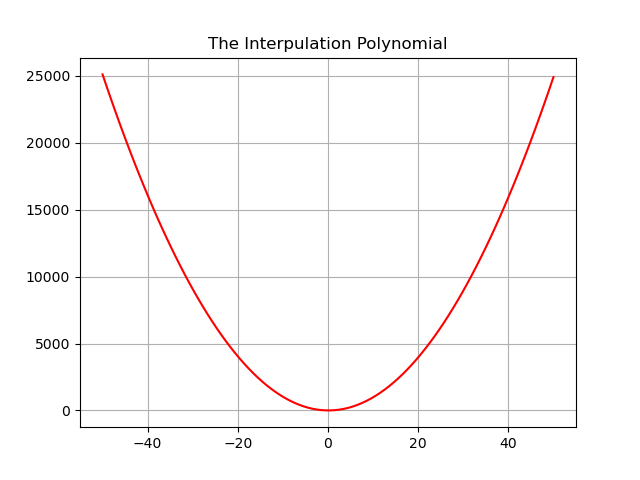

In [64]:
# example from class
x_sample = np.array([0,1,2])
f_sample = np.array([4,12,40])

# in our example: p(x) = 10x^2-2x+4 
X = np.linspace(-50,50,100)
Y = p(X, f_sample, x_sample)
plt.plot(X,Y,'r')
plt.title("The Interpulation Polynomial")
_ = plt.grid()

